In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("CIFR(Ass2&3)/train_data.csv")
test = pd.read_csv('CIFR(ASS2&3)/test_data.csv')

In [6]:
print(train.head())
print(test.head())
print(train.shape)
print(len(set(train['label'])))

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0       59       62       63       43       46       45       50       48   
1      154      177      187      126      137      136      105      104   
2      255      255      255      253      253      253      253      253   
3       28       25       10       37       34       19       38       35   
4      170      180      198      168      178      196      177      185   

   pixel_8  pixel_9  ...  pixel_3063  pixel_3064  pixel_3065  pixel_3066  \
0       43       68  ...         216         184         140         151   
1       95      102  ...         143         133         139         143   
2      253      253  ...          78          85          83          79   
3       20       42  ...          54          47          28          63   
4      203      183  ...          75          79          82          71   

   pixel_3067  pixel_3068  pixel_3069  pixel_3070  pixel_3071  label  
0        

In [7]:
x_train=train.drop(['label'],axis=1)
y_train=train['label']
x_train=x_train/255.0
x_train.shape


(50000, 3072)

In [8]:
model = Sequential()

model.add(Dense(128,activation='relu', input_shape=(3072,)))
model.add(Dense(64,activation='relu', input_shape=(3072,)))
model.add(Dense(32,activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=11,batch_size=512)

Epoch 1/11
79/79 [==============================] - 2s 19ms/step - loss: 2.1713 - accuracy: 0.1902 - val_loss: 2.0651 - val_accuracy: 0.2327
Epoch 2/11
79/79 [==============================] - 1s 14ms/step - loss: 1.9783 - accuracy: 0.2695 - val_loss: 1.8709 - val_accuracy: 0.3326
Epoch 3/11
79/79 [==============================] - 1s 15ms/step - loss: 1.8660 - accuracy: 0.3227 - val_loss: 1.8444 - val_accuracy: 0.3438
Epoch 4/11
79/79 [==============================] - 1s 14ms/step - loss: 1.8076 - accuracy: 0.3472 - val_loss: 1.7598 - val_accuracy: 0.3621
Epoch 5/11
79/79 [==============================] - 1s 15ms/step - loss: 1.7621 - accuracy: 0.3642 - val_loss: 1.7273 - val_accuracy: 0.3800
Epoch 6/11
79/79 [==============================] - 1s 14ms/step - loss: 1.7253 - accuracy: 0.3761 - val_loss: 1.6895 - val_accuracy: 0.3962
Epoch 7/11
79/79 [==============================] - 1s 14ms/step - loss: 1.6871 - accuracy: 0.3947 - val_loss: 1.6516 - val_accuracy: 0.4093
Epoch 8/11
79

In [14]:
x_test=test.drop(['label'],axis=1)
y_test=test['label']
pred= model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
print(pred)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.9632190e-26 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 7.9037356e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]


6


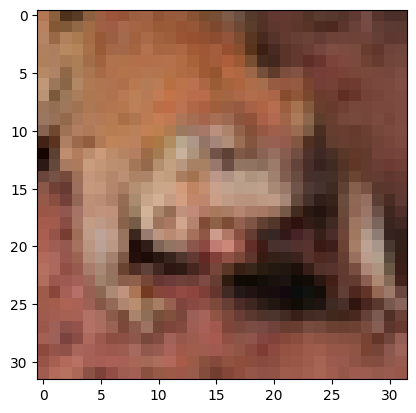

In [32]:
idx=5
x_test_val=x_test.values
image=x_test_val[idx]
plt.imshow(image.reshape(32,32,3))
print(np.argmax(pred[idx]))

In [28]:
loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 157.7979 - accuracy: 0.4172
157.79788208007812
41.71999990940094


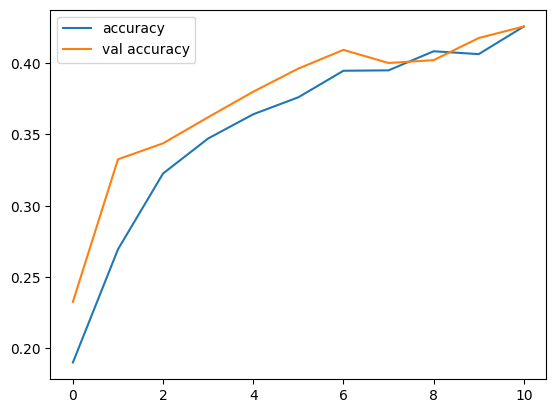

In [33]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()